<a href="https://colab.research.google.com/github/dlguswn3659/class-MachineLearning/blob/master/assignment04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Machine Learning Assignment04** #

Name : 이현주

Student # : 20184060

# **1. Plot the estimated parameters using the training dataset [3pt]**

- plot the estimated parameters {(θ0,θ1,θ2,θ3)} at every iteration of gradient descent until convergence

- the colors for the parameters {(θ0,θ1,θ2,θ3)} should be black, red, green, blue, respectively

- the optimization is performed using the training dataset ('data_train.csv')

In [0]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import matplotlib.animation as animation
from scipy import stats 
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets.samples_generator import make_regression 
import csv
# from google.colab import files

# uploaded = files.upload()

train_point = [[0]*3 for i in range(300)]
test_point = [[0]*4 for i in range(300)]
y = [[0]*1 for i in range(300)]

with open('data_train.csv', newline='') as myfile:
    reader  = csv.reader(myfile, delimiter=',')
    ct = 0 
    for i in reader:
        # print('[', ct, ']', 'x =', i[0], ', y = ', i[1], ', z = ', i[2], ', h = ', i[3])
        # train_point[ct][0] = 1
        # train_point[ct][1] = i[0]
        # train_point[ct][2] = i[1]
        # train_point[ct][3] = i[2]
        train_point[ct][0] = i[0]
        train_point[ct][1] = i[1]
        train_point[ct][2] = i[2]
        y[ct][0] = i[3]
        ct += 1

y = np.array(y,dtype=float)
# print(y)

with open('data_test.csv', newline='') as myfile:
    reader  = csv.reader(myfile, delimiter=',')
    ct = 0 
    for i in reader:
        # print('[', ct, ']', 'x =', i[0], ', y = ', i[1], ', z = ', i[2], ', h = ', i[3])
        test_point[ct][0] = i[0]
        test_point[ct][1] = i[1]
        test_point[ct][2] = i[2]
        # test_point[ct][3] = i[3]
        ct += 1


In [0]:
X = train_point

# print(X)
# print(test_point)

In [0]:
# X_b = np.c_[np.ones((300,4)),X]
# X_b=np.array(X_b,dtype=float)
# y=np.array(y, dtype=float)
# theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
# print(theta_best)

In [0]:
# X_new = np.array([[0],[2]])
# X_new_b = np.c_[np.ones((2,1)),X_new]
# print(X_new_b.shape)
# print(X_new)
# y_predict = X_new_b.dot(theta_best)

# y_predict

In [0]:

def  cal_cost(theta,X,y):
    '''
    
    Calculates the cost for given X and Y. The following shows and example of a single dimensional X
    theta = Vector of thetas 
    X     = Row of X's np.zeros((2,j))
    y     = Actual y's np.zeros((2,1))
    
    where:
        j is the no of features
    '''
    
    m = len(y)
    
    predictions = X.dot(theta)
    # print(X)
    # print(theta)

    cost = (1/(2*m)) * np.sum(np.square(predictions-y))
    return cost


In [0]:
def gradient_descent(X,y,theta,learning_rate=0.0000001,iterations=1000):
    '''
    X    = Matrix of X with added bias units
    y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    learning_rate 
    iterations = no of iterations
    
    Returns the final theta vector and array of cost history over no of iterations
    '''
    m = len(y)
    # theta[0][0] = 1
    # theta[1][0] = 1
    # theta[2][0] = 1
    # theta[3][0] = 1
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,4))
    for it in range(iterations):
        # X = np.array(X,dtype=float)
        # theta = np.array(theta,dtype=float)
        
        # prediction = np.dot(X,theta)

        # print(prediction.shape)
        # print(X.shape)
        # print(theta.shape)

        # tmp0 = theta[0][m]
        # tmp1 = theta[1][m]
        # tmp2 = theta[2][m]
        # tmp3 = theta[3][m]
        
        pred = 0
        pred0 = 0
        pred1 = 0
        pred2 = 0
        pred3 = 0

        for i in range(0, m):
          # print(i)
          #cost 함수
          pred = pred + (theta[0][it]*X[i][0] + theta[1][it]*X[i][1] + theta[2][it]*X[i][2] + theta[3][it]*X[i][3] - y[i][0])*(theta[0][it]*X[i][0] + theta[1][it]*X[i][1] + theta[2][it]*X[i][2] + theta[3][it]*X[i][3] - y[i][0])
          
          #theta함수
          pred0 = pred0 + (theta[0][it]*X[i][0] + theta[1][it]*X[i][1] + theta[2][it]*X[i][2] + theta[3][it]*X[i][3] - y[i][0])*X[i][0]
          pred1 = pred1 + (theta[0][it]*X[i][0] + theta[1][it]*X[i][1] + theta[2][it]*X[i][2] + theta[3][it]*X[i][3] - y[i][0])*X[i][1]
          pred2 = pred2 + (theta[0][it]*X[i][0] + theta[1][it]*X[i][1] + theta[2][it]*X[i][2] + theta[3][it]*X[i][3] - y[i][0])*X[i][2]
          pred3 = pred3 + (theta[0][it]*X[i][0] + theta[1][it]*X[i][1] + theta[2][it]*X[i][2] + theta[3][it]*X[i][3] - y[i][0])*X[i][3]
        
        # print(it)
        theta[0][it + 1] = theta[0][it] - (1/m)*learning_rate*pred0
        theta[1][it + 1] = theta[1][it] - (1/m)*learning_rate*pred1
        theta[2][it + 1] = theta[2][it] - (1/m)*learning_rate*pred2
        theta[3][it + 1] = theta[3][it] - (1/m)*learning_rate*pred3
        # theta = theta - (1/m)*learning_rate*( X.T.dot((prediction - y)))

        theta_history[it][0] = theta[0][it]
        theta_history[it][1] = theta[1][it]
        theta_history[it][2] = theta[2][it]
        theta_history[it][3] = theta[3][it]
        # theta_history[it,:] =theta.T
        # cost_history[it]  = cal_cost(theta,X,y)
        cost_history[it]  = (1/(2*m)) * pred
        
    return theta, cost_history, theta_history
        
    
    

In [0]:
def  new_cost(X,y,theta,iterations=10000):
    
    m = len(y)
    
    cost_history = np.zeros(iterations)

    for it in range(iterations):

        pred = 0

        for i in range(0, m):
          pred = pred + (theta[0][it]*X[i][0] + theta[1][it]*X[i][1] + theta[2][it]*X[i][2] + theta[3][it]*X[i][3] - y[i][0])*(theta[0][it]*X[i][0] + theta[1][it]*X[i][1] + theta[2][it]*X[i][2] + theta[3][it]*X[i][3] - y[i][0])
        
        cost_history[it]  = (1/(2*m)) * pred

    return cost_history

In [311]:
lr =0.0000001
n_iter = 1000

# theta = np.random.randn(4,n_iter + 1)
theta = np.zeros((4, n_iter + 1))
# print(theta)

X_b = np.c_[np.ones((len(X),1)),X]
X_b = np.array(X_b,dtype=float)
# print(X_b.shape)
# print(X_b.dtype)
# print(y.dtype)
theta,cost_history,theta_history = gradient_descent(X_b,y,theta,lr,n_iter)
# print(cost_history)

# print(theta[1])

print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))

Theta0:          0.000,
Theta1:          0.000
Final cost/MSE:  708.484


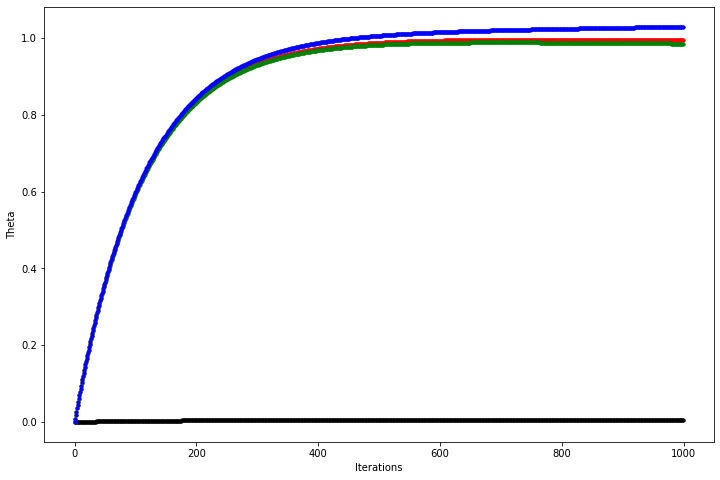

In [312]:
fig,ax = plt.subplots(figsize=(12,8))

theta0_history = []
theta1_history = []
theta2_history = []
theta3_history = []

for it in range(n_iter):
  theta0_history.append(theta_history[it][0])
  theta1_history.append(theta_history[it][1])
  theta2_history.append(theta_history[it][2])
  theta3_history.append(theta_history[it][3])

# print(theta0_history)

ax.set_ylabel('Theta')
ax.set_xlabel('Iterations')
_=ax.plot(range(n_iter),theta0_history,'b.', color = 'black')
_=ax.plot(range(n_iter),theta1_history,'b.', color = 'red')
_=ax.plot(range(n_iter),theta2_history,'b.', color = 'green')
_=ax.plot(range(n_iter),theta3_history,'b.', color = 'blue')


# **2. Plot the training error using the training dataset [4pt]**

- plot the training error J(θ0,θ1,θ2,θ3) at every iteration of gradient descent until convergence (in blue color)

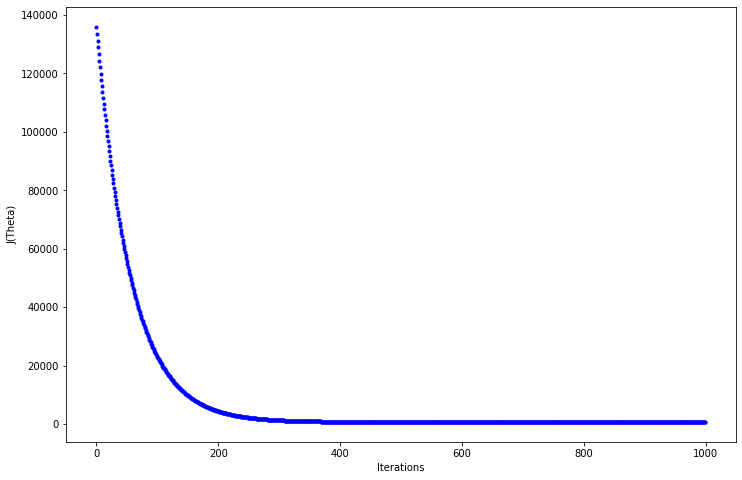

In [313]:
fig,ax = plt.subplots(figsize=(12,8))

# n_iter = 50
# cost_history = new_cost(X_b,y,theta,n_iter)

ax.set_ylabel('J(Theta)')
ax.set_xlabel('Iterations')
_=ax.plot(range(n_iter),cost_history,'b.')

# print(cost_history)

# **3. Plot the testing error using the testing dataset at every iteration of gradient descent until convergence [5pt]**

* plot the testing error J(θ0,θ1,θ2,θ3) at every iteration of gradient descent until convergence (in red color)

In [0]:
with open('data_test.csv', newline='') as myfile:
    reader  = csv.reader(myfile, delimiter=',')
    ct = 0 
    for i in reader:
        # print('[', ct, ']', 'x =', i[0], ', y = ', i[1], ', z = ', i[2], ', h = ', i[3])
        test_point[ct][0] = i[0]
        test_point[ct][1] = i[1]
        test_point[ct][2] = i[2]
        y[ct][0] = i[3]
        ct += 1

In [0]:
X = test_point

In [316]:
lr =0.0000001
n_iter = 1000

theta = np.random.randn(4,n_iter + 1)
# print(theta)

X_b = np.c_[np.ones((len(X),1)),X]
X_b = np.array(X_b,dtype=float)
# print(X_b.shape)
# print(X_b.dtype)
# print(y.dtype)
theta,cost_history,theta_history = gradient_descent(X_b,y,theta,lr,n_iter)
# print(cost_history)

# print(theta[1])

print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))

Theta0:          0.058,
Theta1:          0.655
Final cost/MSE:  615.993


In [0]:
# fig,ax = plt.subplots(figsize=(12,8))

# theta0_history = []
# theta1_history = []
# theta2_history = []
# theta3_history = []

# for it in range(n_iter):
#   theta0_history.append(theta_history[it][0])
#   theta1_history.append(theta_history[it][1])
#   theta2_history.append(theta_history[it][2])
#   theta3_history.append(theta_history[it][3])

# # print(theta0_history)

# ax.set_ylabel('Theta')
# ax.set_xlabel('Iterations')
# _=ax.plot(range(n_iter),theta0_history,'b.', color = 'black')
# _=ax.plot(range(n_iter),theta1_history,'b.', color = 'red')
# _=ax.plot(range(n_iter),theta2_history,'b.', color = 'green')
# _=ax.plot(range(n_iter),theta3_history,'b.', color = 'blue')


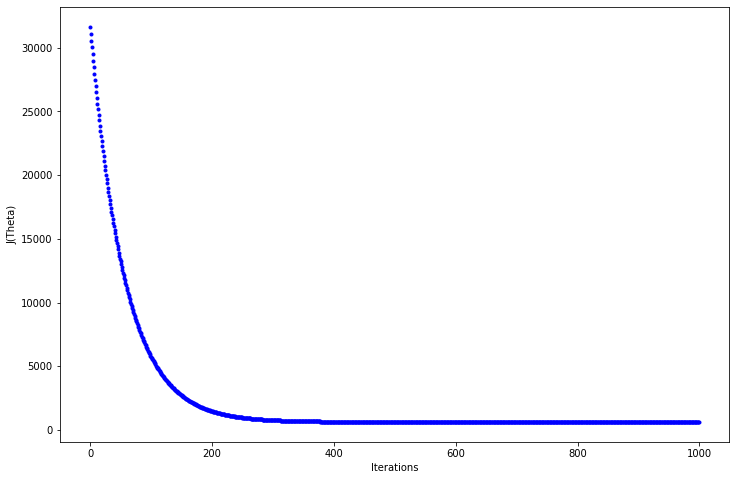

In [317]:
fig,ax = plt.subplots(figsize=(12,8))

# n_iter = 50
# cost_history = new_cost(X_b,y,theta,n_iter)

ax.set_ylabel('J(Theta)')
ax.set_xlabel('Iterations')
_=ax.plot(range(n_iter),cost_history,'b.')

# print(cost_history)